# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy



### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")



Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
      
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
   
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(query_url + city).json()  
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =  city_weather['coord']['lat']
        city_lng =  city_weather['coord']['lon']
        city_max_temp =  city_weather['main']['temp_max']
        city_humidity =  city_weather['main']['humidity']
        city_clouds =  city_weather['clouds']["all"]
        city_wind =  city_weather['wind']['speed']
        city_country =  city_weather['sys']['country']
        city_date =  city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | imst
Processing Record 3 of Set 1 | airai
Processing Record 4 of Set 1 | kodiak
Processing Record 5 of Set 1 | mogadishu
Processing Record 6 of Set 1 | saint-augustin
Processing Record 7 of Set 1 | lavrentiya
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | ponta delgada
Processing Record 10 of Set 1 | longyearbyen
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | llodio
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | kuryk
Processing Record 15 of Set 1 | sao filipe
Processing Record 16 of Set 1 | somerset
Processing Record 17 of Set 1 | tuatapere
Processing Record 18 of Set 1 | narsaq
Processing Record 19 of Set 1 | teacapan
Processing Record 20 of Set 1 | norman wells
Processing Record 21 of Set 1 | georgetown
Processing Record 22 of Set 1 | vardo
Processing Record 23 of Set 1 | bro

Processing Record 40 of Set 4 | luau
Processing Record 41 of Set 4 | rybinsk
Processing Record 42 of Set 4 | clyde river
Processing Record 43 of Set 4 | salalah
Processing Record 44 of Set 4 | kaitong
Processing Record 45 of Set 4 | touros
Processing Record 46 of Set 4 | mangrol
Processing Record 47 of Set 4 | semey
Processing Record 48 of Set 4 | wanning
Processing Record 49 of Set 4 | lompoc
Processing Record 0 of Set 5 | henties bay
Processing Record 1 of Set 5 | murray bridge
Processing Record 2 of Set 5 | grindavik
Processing Record 3 of Set 5 | marzuq
Processing Record 4 of Set 5 | faya
Processing Record 5 of Set 5 | aleksandrovka
Processing Record 6 of Set 5 | mananara
Processing Record 7 of Set 5 | youkounkoun
Processing Record 8 of Set 5 | soyo
Processing Record 9 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 10 of Set 5 | phuthaditjhaba
Processing Record 11 of Set 5 | komsomolskiy
Processing Record 12 of Set 5 | ilulissat
Processing Record 13 of Set 5 | se

Processing Record 27 of Set 8 | puerto maldonado
Processing Record 28 of Set 8 | roald
Processing Record 29 of Set 8 | port lincoln
Processing Record 30 of Set 8 | whitehorse
Processing Record 31 of Set 8 | abu zabad
Processing Record 32 of Set 8 | devavanya
Processing Record 33 of Set 8 | fukue
Processing Record 34 of Set 8 | kirs
Processing Record 35 of Set 8 | samarai
Processing Record 36 of Set 8 | naze
Processing Record 37 of Set 8 | iqaluit
Processing Record 38 of Set 8 | te anau
Processing Record 39 of Set 8 | waipawa
Processing Record 40 of Set 8 | vostok
Processing Record 41 of Set 8 | victoria
Processing Record 42 of Set 8 | olafsvik
Processing Record 43 of Set 8 | kimbe
Processing Record 44 of Set 8 | sisimiut
Processing Record 45 of Set 8 | cockburn harbour
City not found. Skipping...
Processing Record 46 of Set 8 | dingle
Processing Record 47 of Set 8 | diffa
Processing Record 48 of Set 8 | coquimbo
Processing Record 49 of Set 8 | kodinsk
Processing Record 0 of Set 9 | kiu

Processing Record 18 of Set 12 | okhotsk
Processing Record 19 of Set 12 | manta
Processing Record 20 of Set 12 | abu kamal
Processing Record 21 of Set 12 | inongo
Processing Record 22 of Set 12 | joensuu
Processing Record 23 of Set 12 | chumikan
Processing Record 24 of Set 12 | solnechnyy
Processing Record 25 of Set 12 | perry hall
Processing Record 26 of Set 12 | paoua
Processing Record 27 of Set 12 | montepuez
Processing Record 28 of Set 12 | meiktila
Processing Record 29 of Set 12 | mani
Processing Record 30 of Set 12 | tumut
Processing Record 31 of Set 12 | geraldton
Processing Record 32 of Set 12 | mersing
Processing Record 33 of Set 12 | keti bandar
Processing Record 34 of Set 12 | karakendzha
City not found. Skipping...
Processing Record 35 of Set 12 | vallenar
Processing Record 36 of Set 12 | asau
Processing Record 37 of Set 12 | praya
Processing Record 38 of Set 12 | karachi
Processing Record 39 of Set 12 | saraza
Processing Record 40 of Set 12 | tooele
Processing Record 41 of

In [9]:
#Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cape town,-33.9258,18.4232,18.95,80,0,5.14,ZA,1673134240
1,imst,47.2684,10.6698,-0.85,78,63,2.73,AT,1673134324
2,airai,-8.9266,125.4092,19.68,73,95,1.23,TL,1673134325
3,kodiak,57.7900,-152.4072,-0.27,74,0,8.75,US,1673134326
4,mogadishu,2.0371,45.3438,25.26,85,15,7.72,SO,1673134112


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cape town,-33.9258,18.4232,18.95,80,0,5.14,ZA,1673134240
1,imst,47.2684,10.6698,-0.85,78,63,2.73,AT,1673134324
2,airai,-8.9266,125.4092,19.68,73,95,1.23,TL,1673134325
3,kodiak,57.7900,-152.4072,-0.27,74,0,8.75,US,1673134326
4,mogadishu,2.0371,45.3438,25.26,85,15,7.72,SO,1673134112


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

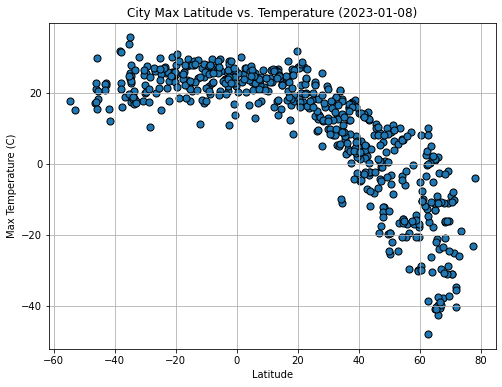

In [14]:
# Build scatter plot for latitude vs. temperature

city_data_df.plot(kind="scatter", x="Lat", y="Max Temp",s=50,grid=True, figsize=(8,6),edgecolors="black",marker="o",)
# Incorporate the other graph properties

plt.title("City Max Latitude vs. Temperature (2023-01-08)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")


# Save the figure
plt.savefig("../output_data/Fig1.png")

# # Show plot
plt.show()

#### Latitude Vs. Humidity

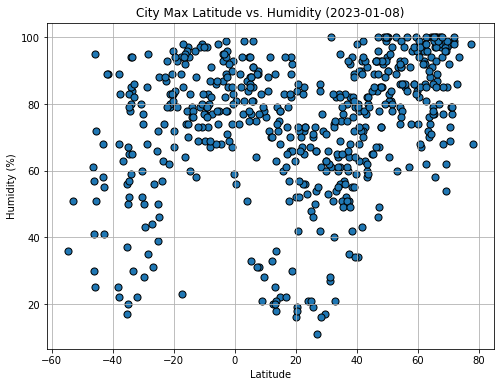

In [15]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Lat", y="Humidity",s=50,grid=True, figsize=(8,6),edgecolors="black",marker="o",)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (2023-01-08)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

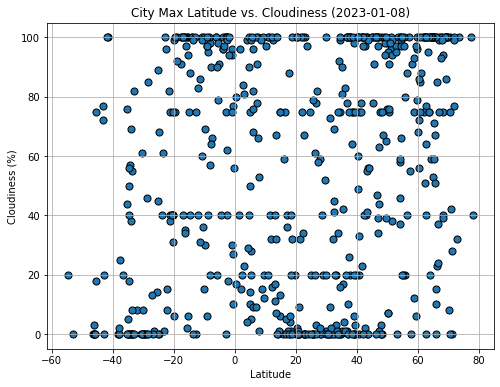

In [16]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness",s=50,grid=True, figsize=(8,6),edgecolors="black",marker="o",)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (2023-01-08)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

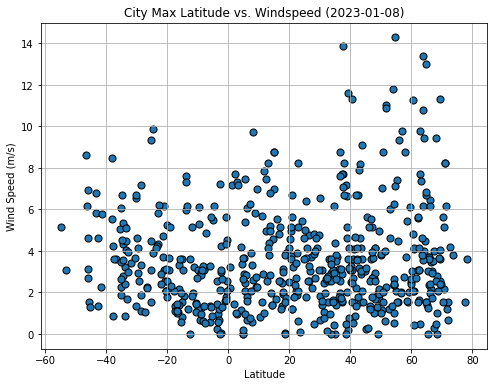

In [17]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed",s=50,grid=True, figsize=(8,6),edgecolors="black",marker="o",)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Windspeed (2023-01-08)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
# Define a function to create Linear Regression plots
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,imst,47.2684,10.6698,-0.85,78,63,2.73,AT,1673134324
3,kodiak,57.7900,-152.4072,-0.27,74,0,8.75,US,1673134326
4,mogadishu,2.0371,45.3438,25.26,85,15,7.72,SO,1673134112
5,saint-augustin,51.2260,-58.6502,-8.54,81,96,0.63,CA,1673134329
6,lavrentiya,65.5833,-171.0000,-21.05,97,67,2.38,RU,1673134330


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_hemi_df=city_data_df.loc[city_data_df["Lat"]<0,:]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cape town,-33.9258,18.4232,18.95,80,0,5.14,ZA,1673134240
2,airai,-8.9266,125.4092,19.68,73,95,1.23,TL,1673134325
7,hermanus,-34.4187,19.2345,19.33,78,57,4.36,ZA,1673134331
10,puerto ayora,-0.7393,-90.3518,24.19,93,27,1.79,EC,1673134142
12,ushuaia,-54.8000,-68.3000,17.81,36,20,5.14,AR,1673134337


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8422711793313896


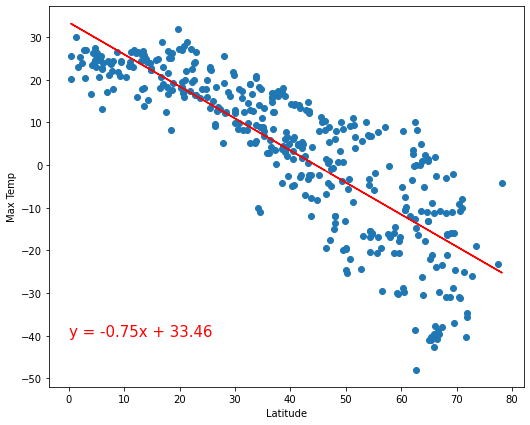

In [21]:
# Linear regression on Northern Hemisphere
x_n_values = northern_hemi_df['Lat']
y_n_t_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_n_values, y_n_t_values)
regress_values = x_n_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(8.5, 7))
plt.scatter(x_n_values,y_n_t_values)
plt.plot(x_n_values,regress_values,"r-")
plt.annotate(line_eq,(0,-40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

print(f"The r-value is: {rvalue}")

plt.show()





The r-value is: 0.22047175494494625


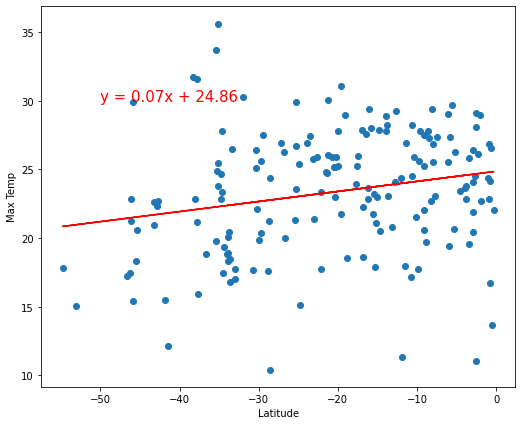

In [22]:
# Linear regression on Southern Hemisphere
x_s_values = southern_hemi_df['Lat']
y_s_t_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_s_values, y_s_t_values)
regress_values = x_s_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(8.5, 7))
plt.scatter(x_s_values,y_s_t_values)
plt.plot(x_s_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.40024810614723033


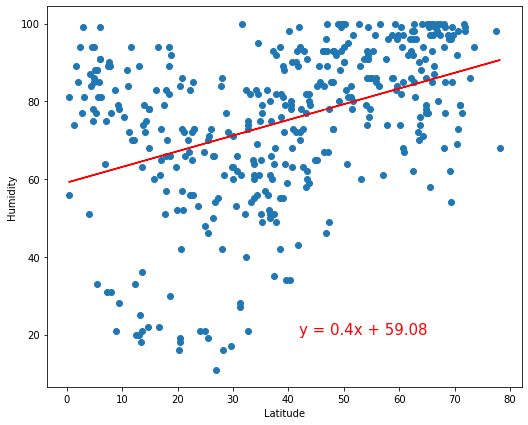

In [23]:
# Northern Hemisphere
x_n_values = northern_hemi_df['Lat']
y_n_h_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_n_values, y_n_h_values)
regress_values = x_n_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(8.5, 7))
plt.scatter(x_n_values,y_n_h_values)
plt.plot(x_n_values,regress_values,"r-")
plt.annotate(line_eq,(42,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.49489813349324996


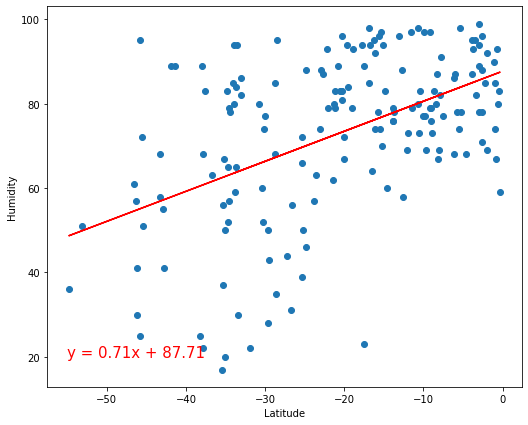

In [24]:
# Southern Hemisphere
x_s_values = southern_hemi_df['Lat']
y_s_h_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_s_values, y_s_h_values)
regress_values = x_s_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(8.5, 7))
plt.scatter(x_s_values,y_s_h_values)
plt.plot(x_s_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.29391917477346746


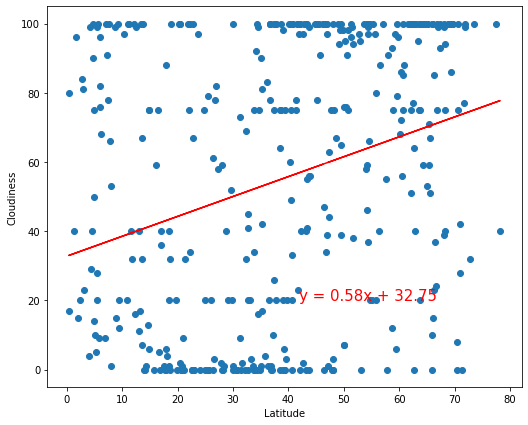

In [25]:
# Northern Hemisphere
x_n_values = northern_hemi_df['Lat']
y_n_c_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_n_values, y_n_c_values)
regress_values = x_n_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(8.5, 7))
plt.scatter(x_n_values,y_n_c_values)
plt.plot(x_n_values,regress_values,"r-")
plt.annotate(line_eq,(42,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.5064694822460408


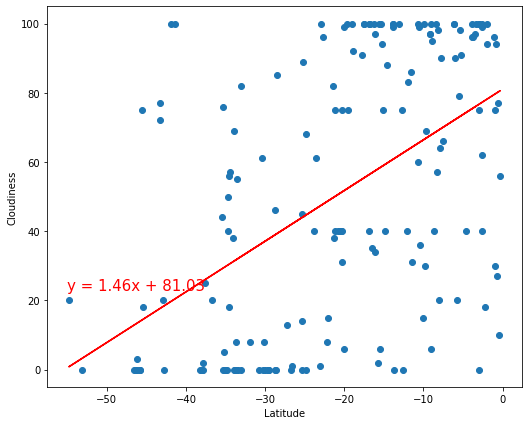

In [26]:
# Southern Hemisphere
x_s_values = southern_hemi_df['Lat']
y_s_c_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_s_values, y_s_c_values)
regress_values = x_s_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(8.5, 7))
plt.scatter(x_s_values,y_s_c_values)
plt.plot(x_s_values,regress_values,"r-")
plt.annotate(line_eq,(-55,23),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.07852621937996555


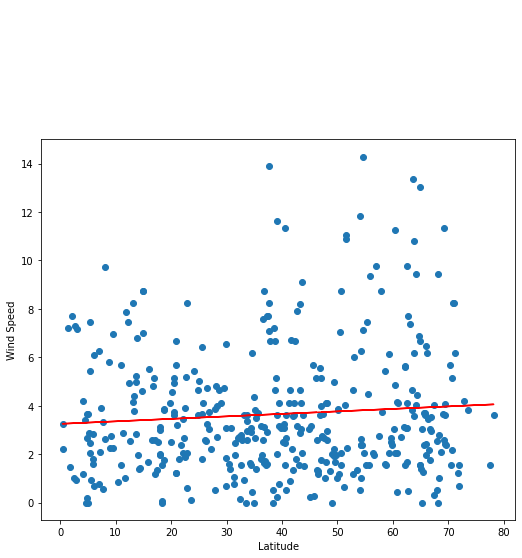

In [27]:
# Northern Hemisphere
x_n_values = northern_hemi_df['Lat']
y_n_w_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_n_values, y_n_w_values)
regress_values = x_n_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(8.5, 7))
plt.scatter(x_n_values,y_n_w_values)
plt.plot(x_n_values,regress_values,"r-")
plt.annotate(line_eq,(42,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.3224429304883091


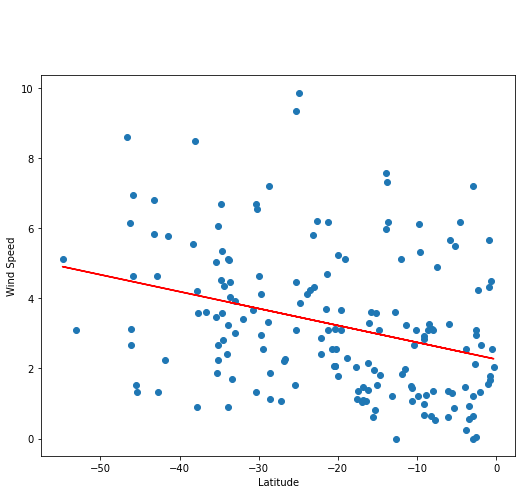

In [30]:
# Southern Hemisphere
x_s_values = southern_hemi_df['Lat']
y_s_w_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_s_values, y_s_w_values)
regress_values = x_s_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(8.5, 7))
plt.scatter(x_s_values,y_s_w_values)
plt.plot(x_s_values,regress_values,"r-")
plt.annotate(line_eq,(-50,12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE